In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 
import string
import re 
import nltk
from nltk.corpus import stopwords,wordnet
from bs4 import BeautifulSoup
from tqdm import tqdm

In [3]:
train=pd.read_csv('train.csv')

In [4]:
test=pd.read_csv('test.csv')

In [5]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [6]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [7]:
clean_tweet=[]
for sentence in tqdm(train['tweet'].values):
    sentence=re.sub(r"http\S+", "",sentence)
    sentence=re.sub("\S*@\S*\s?", "",sentence)
    sentence=BeautifulSoup(sentence,"lxml").get_text()
    sentence=re.sub("S*\d\S*","",sentence).strip()
    sentence=re.sub("[^A-Za-z0-9]"," ",sentence)
    sentence=" ".join(x.lower() for x in sentence.split() if x.lower() not in stopwords)
    clean_tweet.append(sentence.strip())
    

100%|██████████| 7920/7920 [00:01<00:00, 4336.64it/s]


In [9]:
clean_tweet_test=[]
for sentence in tqdm(test['tweet'].values):
    sentence=re.sub(r"http\S+", "",sentence)
    sentence=re.sub("\S*@\S*\s?", "",sentence)
    sentence=BeautifulSoup(sentence,"lxml").get_text()
    sentence=re.sub("S*\d\S*","",sentence).strip()
    sentence=re.sub("[^A-Za-z0-9]"," ",sentence)
    sentence=" ".join(x.lower() for x in sentence.split() if x.lower() not in stopwords)
    clean_tweet_test.append(sentence.strip())
    

100%|██████████| 1953/1953 [00:00<00:00, 4211.24it/s]


# Using Tf-Idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1,2),min_df=10)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [12]:
X=clean_tweet

In [14]:
X

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone',
 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias',
 'love would go talk makememories unplug relax iphone smartphone wifi connect',
 'wired know george made way iphone cute daventry home',
 'amazing service apple even talk question unless pay stupid support',
 'iphone software update fucked phone big time stupid iphones',
 'happy us instapic instadaily us sony xperia xperiaz',
 'new type c charger cable uk bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipes technology samsunggalaxy iphonex pic twitter com pjiwq',
 'bout go shopping listening music iphone justme music likeforlike followforfollow',
 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor',
 'hey apple make new ipod dont make new color thinner make not crash every five fuckin minite',
 'ha not heavy machinery need really 

In [15]:
y=np.array(train['label'])

In [16]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
X_1,X_test,y_1,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train,X_cv,y_train,y_cv=train_test_split(X_1,y_1,test_size=0.3)

In [30]:
final_Xtrain=tfidf.fit_transform(X_train)
final_Xcv=tfidf.transform(X_cv)
final_Xtest=tfidf.transform(X_test)

In [31]:
final_Xtrain

<3880x862 sparse matrix of type '<class 'numpy.float64'>'
	with 32177 stored elements in Compressed Sparse Row format>

In [32]:
auc_train=[]
auc_cv=[]
cv_score=[]
K=list(range(1,30,2))
for i in K:
    knn=KNeighborsClassifier(n_neighbors=i,algorithm='brute',leaf_size=30,p=2,metric='cosine',weights='uniform')
    knn.fit(final_Xtrain,y_train)
    pred=knn.predict_proba(final_Xcv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,pred))
    pred1=knn.predict_proba(final_Xtrain)[:,1]
    auc_train.append(roc_auc_score(y_train,pred1))

    

In [33]:
auc_cv

[0.7546276639328997,
 0.8513430467719949,
 0.8852227610300416,
 0.900877673244095,
 0.9029643120516659,
 0.9074774482856228,
 0.9087102505083913,
 0.909075249353803,
 0.9115054712582031,
 0.9129589488033253,
 0.9142075800576549,
 0.9156852667098705,
 0.9161387219081245,
 0.9181350421238463,
 0.9197896414817464]

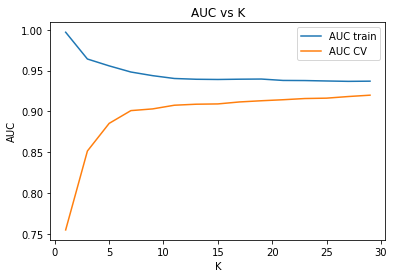

In [34]:
fig=plt.figure()
ax=plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()
    

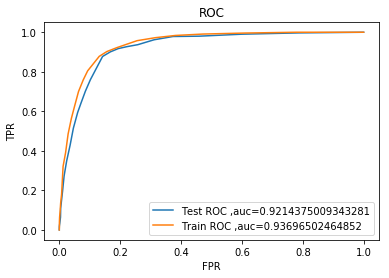

In [35]:
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=29,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(final_Xtrain,y_train)
predi=knn.predict_proba(final_Xtest)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=knn.predict_proba(final_Xtrain)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

In [36]:
#confusion metrics 
knn=KNeighborsClassifier(n_neighbors=29,weights='uniform',p=2,metric='cosine',leaf_size=30,algorithm='brute')
knn.fit(final_Xtrain,y_train)
predicted=knn.predict(final_Xtest)

In [37]:
con=confusion_matrix(y_test,predicted)
con

array([[1665,  107],
       [ 245,  359]], dtype=int64)

In [38]:
accu=accuracy_score(y_test,predicted)*100
accu

85.18518518518519

In [39]:
j=clean_tweet_test

In [40]:
j

['hate new iphone upgrade let download apps ugh apple sucks',
 'currently shitting fucking pants apple imac cashmoney raddest swagswagswag',
 'like puts cd roms ipad possible yes block screen',
 'ipod officially dead lost pictures videos concert vet camp hatinglife sobbing',
 'fighting itunes night want music paid',
 'repost repostapp announce apple bourbon',
 'new apple software update really things phone bad things apple',
 'baby iphone iphone gold new apple appleisbest geg nnt aaaaah',
 'confused take time set appointment still waiting minutes fact',
 'fruit tastes better pick apple healthy fruit nyc pic twitter com zuo',
 'con mi buddy edgar buddy friend viviendo taller friendly hug sony smile sonrisa',
 'mymomisgreatbecause always care anything follow mothersday mustfollow mothersday iphone tweet',
 'kiss romance hot movie iphone sex porn lustful mature woman getting nailed intensively mission',
 'holding hope loved one news photography fashion health fail tech ipad iphone funny l

In [41]:
finaltest_tweet=tfidf.transform(j)

In [42]:
test_pred=knn.predict(finaltest_tweet)

In [44]:
test['label']=test_pred

In [45]:
test.head()

,id,tweet,label
0,7921,I hate the new #iphone upgrade. Won't let me d...,1
1,7922,currently shitting my fucking pants. #apple #i...,1
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",1
3,7924,My ipod is officially dead. I lost all my pict...,1
4,7925,Been fighting iTunes all night! I only want th...,0


In [46]:
final_tf=test.drop('tweet',axis=1)

In [47]:
final_tf

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,0
5,7926,1
6,7927,0
7,7928,0
8,7929,1
9,7930,0


In [48]:
final_tf.to_csv('FinalTf.csv',index=False)